In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

In [60]:
pwd

'C:\\Users\\dsti0\\DSTI_Workshop\\Notebooks'

In [61]:
df = pd.read_csv('../datasets/ames.csv')

In [62]:
df

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0

In [63]:
100*(df.isna().sum().sort_values(ascending=False)/len(df)).head(30)

Pool.QC           99.556314
Misc.Feature      96.382253
Alley             93.242321
Fence             80.477816
Fireplace.Qu      48.532423
Lot.Frontage      16.723549
Garage.Qual        5.426621
Garage.Yr.Blt      5.426621
Garage.Cond        5.426621
Garage.Finish      5.426621
Garage.Type        5.358362
Bsmt.Exposure      2.832765
BsmtFin.Type.2     2.764505
BsmtFin.Type.1     2.730375
Bsmt.Cond          2.730375
Bsmt.Qual          2.730375
Mas.Vnr.Type       0.784983
Mas.Vnr.Area       0.784983
Bsmt.Full.Bath     0.068259
Bsmt.Half.Bath     0.068259
Garage.Area        0.034130
Garage.Cars        0.034130
Total.Bsmt.SF      0.034130
Bsmt.Unf.SF        0.034130
BsmtFin.SF.2       0.034130
BsmtFin.SF.1       0.034130
Electrical         0.034130
Exterior.2nd       0.000000
Exterior.1st       0.000000
Roof.Matl          0.000000
dtype: float64

In [64]:
df.loc[df.Fence.isna(),"Fence"] = "NoFence"

In [65]:
df.loc[df["Fireplace.Qu"].isna(),"Fireplace.Qu"] =  "NoFireplace"

In [56]:
ratio_area_frontage = (df["Lot.Area"]/df["Lot.Frontage"]).mean()

In [70]:
df.loc[df["Lot.Frontage"].isna(),"Lot.Frontage"] = df.loc[df["Lot.Frontage"].isna(),"Lot.Area"]/ratio_area_frontage

In [67]:
df["Lot.Frontage"]

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot.Frontage, Length: 2930, dtype: float64

Does the quality of Fence has an impact on the SalePrice of the houses?

In [68]:
df.Fence.value_counts()

NoFence    2358
MnPrv       330
GdPrv       118
GdWo        112
MnWw         12
Name: Fence, dtype: int64

In [35]:
df.Fence.value_counts()

NoFence    2358
MnPrv       330
GdPrv       118
GdWo        112
MnWw         12
Name: Fence, dtype: int64

In [38]:
df.loc[df.Fence == "GdPrv","SalePrice"].mean()

176465.91525423728

In [39]:
df.Fence.unique()

array(['NoFence', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [41]:
for fence_value in df.Fence.unique():
    print(f"For the fence quality of {fence_value} the average Sale Price is {df.loc[df.Fence == fence_value,'SalePrice'].mean()}")

For the fence quality of NoFence the average Sale Price is 187938.44783715013
For the fence quality of MnPrv the average Sale Price is 146189.98484848486
For the fence quality of GdPrv the average Sale Price is 176465.91525423728
For the fence quality of GdWo the average Sale Price is 141993.50892857142
For the fence quality of MnWw the average Sale Price is 133720.83333333334


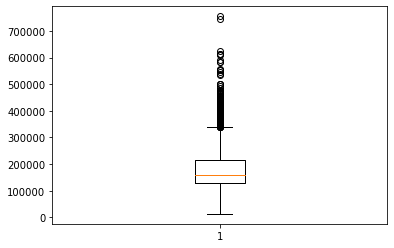

In [43]:
plt.boxplot(df.SalePrice)
plt.show()

In [48]:
df.groupby(by="Fence").agg({"SalePrice":"mean"})

,SalePrice
Fence,
GdPrv,176465.915254
GdWo,141993.508929
MnPrv,146189.984848
MnWw,133720.833333
NoFence,187938.447837


In [50]:
df.groupby(by="Fence").agg("mean").SalePrice


Fence
GdPrv      176465.915254
GdWo       141993.508929
MnPrv      146189.984848
MnWw       133720.833333
NoFence    187938.447837
Name: SalePrice, dtype: float64

In [51]:
df.groupby(by="Fence").agg("median").SalePrice


Fence
GdPrv      162950.0
GdWo       137750.0
MnPrv      137500.0
MnWw       128750.0
NoFence    171250.0
Name: SalePrice, dtype: float64

Question : Can you rank neighbourhoods per attractivity? (Value per area unit?)

In [71]:
100*(df.isna().sum().sort_values(ascending=False)/len(df)).head(30)

Pool.QC           99.556314
Misc.Feature      96.382253
Alley             93.242321
Garage.Yr.Blt      5.426621
Garage.Finish      5.426621
Garage.Qual        5.426621
Garage.Cond        5.426621
Garage.Type        5.358362
Bsmt.Exposure      2.832765
BsmtFin.Type.2     2.764505
Bsmt.Qual          2.730375
Bsmt.Cond          2.730375
BsmtFin.Type.1     2.730375
Mas.Vnr.Area       0.784983
Mas.Vnr.Type       0.784983
Bsmt.Full.Bath     0.068259
Bsmt.Half.Bath     0.068259
Total.Bsmt.SF      0.034130
Garage.Area        0.034130
Garage.Cars        0.034130
Bsmt.Unf.SF        0.034130
BsmtFin.SF.2       0.034130
BsmtFin.SF.1       0.034130
Electrical         0.034130
Year.Remod.Add     0.000000
Exter.Qual         0.000000
Exterior.2nd       0.000000
Exterior.1st       0.000000
Roof.Matl          0.000000
Roof.Style         0.000000
dtype: float64

In [75]:
df = df.drop(columns=["Order","Pool.QC","Misc.Feature","Alley"])

In [76]:
df = df.dropna()

In [77]:
100*(df.isna().sum().sort_values(ascending=False)/len(df)).head(30)

SalePrice         0.0
Foundation        0.0
Roof.Matl         0.0
Exterior.1st      0.0
Exterior.2nd      0.0
Mas.Vnr.Type      0.0
Mas.Vnr.Area      0.0
Exter.Qual        0.0
Exter.Cond        0.0
Bsmt.Qual         0.0
Year.Remod.Add    0.0
Bsmt.Cond         0.0
Bsmt.Exposure     0.0
BsmtFin.Type.1    0.0
BsmtFin.SF.1      0.0
BsmtFin.Type.2    0.0
BsmtFin.SF.2      0.0
Bsmt.Unf.SF       0.0
Roof.Style        0.0
Year.Built        0.0
Sale.Condition    0.0
Utilities         0.0
MS.SubClass       0.0
MS.Zoning         0.0
Lot.Frontage      0.0
Lot.Area          0.0
Street            0.0
Lot.Shape         0.0
Land.Contour      0.0
Lot.Config        0.0
dtype: float64

In [78]:
len(df)

2678

In [79]:
df.shape

(2678, 78)

we have 78 feature. Can we drop some of them?

In [80]:
df.Fence

0       NoFence
1         MnPrv
2       NoFence
3       NoFence
4         MnPrv
         ...   
2924    NoFence
2925      GdPrv
2926      MnPrv
2928    NoFence
2929    NoFence
Name: Fence, Length: 2678, dtype: object

In [82]:
classes,indexes = df.Fence.factorize()

In [88]:
set(classes)

{0, 1, 2, 3, 4}

In [89]:
set(indexes)

{'GdPrv', 'GdWo', 'MnPrv', 'MnWw', 'NoFence'}

In [90]:
encoding_dictionnary = {
    'GdPrv':4,
    'GdWo':3, 
    'MnPrv':2, 
    'MnWw':1, 
    'NoFence':0,
}

In [93]:
encoding_dictionnary["NoFence"]

0

In [94]:
def encode_fence_value(fence_string):
    return encoding_dictionnary[fence_string]

In [95]:
encode_fence_value("NoFence")

0

In [96]:
df.Fence.apply(encode_fence_value)

0       0
1       2
2       0
3       0
4       2
       ..
2924    0
2925    4
2926    2
2928    0
2929    0
Name: Fence, Length: 2678, dtype: int64

In [92]:
df.Fence

0       NoFence
1         MnPrv
2       NoFence
3       NoFence
4         MnPrv
         ...   
2924    NoFence
2925      GdPrv
2926      MnPrv
2928    NoFence
2929    NoFence
Name: Fence, Length: 2678, dtype: object

In [97]:
def compute_power_2(x):
    return x**2

In [98]:
compute_power_2(5)

25

In [99]:
lambda_power_2 = lambda x : x**2

In [101]:
lambda_power_2(5)

25

In [104]:
list(map(compute_power_2,[1,5,9,8]))

[1, 25, 81, 64]

In [105]:
list(map(lambda x: x**2,[1,5,8,9]))

[1, 25, 64, 81]

In [106]:
[x**2 for x in [1,5,8,9]]

[1, 25, 64, 81]

In [107]:
df_encoded = df.copy()

In [108]:
df_encoded

,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Fence,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,526301100,20,RL,141.000000,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NoFence,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.000000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NoFireplace,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,MnPrv,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.000000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NoFireplace,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NoFence,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.000000,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NoFence,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.000000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,MnPrv,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,923251180,20,RL,160.000000,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NoFence,0,9,2006,WD,Abnorml,131000
2925,923275080,80,RL,37.000000,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NoFireplace,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,GdPrv,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,63.160733,8885,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NoFireplace,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,

In [110]:
df_encoded.loc[:,"Fence"] = df_encoded.Fence.apply(lambda fence: encoding_dictionnary[fence])

In [112]:
df_encoded.Fence

0       0
1       2
2       0
3       0
4       2
       ..
2924    0
2925    4
2926    2
2928    0
2929    0
Name: Fence, Length: 2678, dtype: int64

Useful trick

In [115]:
df_encoded.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [116]:
df_encoded.select_dtypes("object")

,MS.Zoning,Street,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.Type.2,Heating,Heating.QC,Central.Air,Electrical,Kitchen.Qual,Functional,Fireplace.Qu,Garage.Type,Garage.Finish,Garage.Qual,Garage.Cond,Paved.Drive,Sale.Type,Sale.Condition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NoFireplace,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NoFireplace,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Abnorml
2925,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NoFireplace,Detchd,Unf,TA,TA,Y,WD,Normal
2926,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,BLQ,ALQ,GasA,TA,Y,SBrkr,TA,Typ,NoFireplace,Attchd,Unf,TA,TA,Y,WD,Normal
2928,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,ALQ,LwQ,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [120]:
object_columns = df_encoded.select_dtypes("object").columns.tolist()

In [121]:
object_columns

['MS.Zoning',
 'Street',
 'Lot.Shape',
 'Land.Contour',
 'Utilities',
 'Lot.Config',
 'Land.Slope',
 'Neighborhood',
 'Condition.1',
 'Condition.2',
 'Bldg.Type',
 'House.Style',
 'Roof.Style',
 'Roof.Matl',
 'Exterior.1st',
 'Exterior.2nd',
 'Mas.Vnr.Type',
 'Exter.Qual',
 'Exter.Cond',
 'Foundation',
 'Bsmt.Qual',
 'Bsmt.Cond',
 'Bsmt.Exposure',
 'BsmtFin.Type.1',
 'BsmtFin.Type.2',
 'Heating',
 'Heating.QC',
 'Central.Air',
 'Electrical',
 'Kitchen.Qual',
 'Functional',
 'Fireplace.Qu',
 'Garage.Type',
 'Garage.Finish',
 'Garage.Qual',
 'Garage.Cond',
 'Paved.Drive',
 'Sale.Type',
 'Sale.Condition']

In [124]:
for col in object_columns:
    df_encoded.loc[:,col] = df_encoded.loc[:,col].factorize()[0]

In [123]:
df_encoded.loc[:,col].factorize()

(array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 Index(['RL', 'RH', 'FV', 'RM', 'C (all)', 'I (all)'], dtype='object'))

In [126]:
df_encoded.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [128]:
df_encoded[object_columns]

,MS.Zoning,Street,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.Type.2,Heating,Heating.QC,Central.Air,Electrical,Kitchen.Qual,Functional,Fireplace.Qu,Garage.Type,Garage.Finish,Garage.Qual,Garage.Cond,Paved.Drive,Sale.Type,Sale.Condition
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,0,0,0,1,1,2,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,0,0,0,1,1,2,0,0,2,0,0,2,0,2,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,1,1,0,0,1,1,1,1,3,0,0,3,0,0,0,0,2,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,0,0,1,0,0,1,0,22,0,0,0,0,1,0,1,1,1,0,0,0,0,1,1,2,0,0,2,0,0,0,0,2,3,1,0,0,1,0,3
2925,0,0,0,0,0,2,0,22,0,0,0,4,1,0,4,5,1,0,0,0,0,1,3,3,0,0,1,0,0,0,0,1,3,1,0,0,1,0,0
2926,0,0,0,3,0,1,1,22,0,0,0,0,1,0,4,5,1,0,0,0,1,1,3,0,5,0,1,0,0,0,0,1,0,1,0,0,1,0,0
2928,0,0,1,0,0,1,1,22,0,0,0,0,1,0,4,5,1,0,0,0,1,1,3,2,1,0,3,0,0,0,0,2,0,2,0,0,1,0,0


In [138]:
df_encoded.corr()["SalePrice"].sort_values(ascending=False)

SalePrice       1.000000
Overall.Qual    0.793249
Gr.Liv.Area     0.715867
Garage.Cars     0.652448
Garage.Area     0.633467
                  ...   
Electrical     -0.209185
PID            -0.221548
MS.Zoning      -0.265140
Exterior.1st   -0.269884
Garage.Type    -0.393836
Name: SalePrice, Length: 78, dtype: float64

In [139]:
df_encoded.corr()

,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Fence,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
PID,1.000000,-0.032210,0.287691,0.005520,0.041301,0.049597,0.112839,0.206223,-0.006922,-0.042269,0.142588,0.836893,-0.064354,-0.000838,-0.021507,0.168132,-0.239764,0.123295,-0.324840,-0.146529,0.119326,0.015603,0.044411,0.016880,-0.101590,-0.219392,-0.170651,0.120830,0.246534,-0.068415,0.086903,0.061776,0.044617,-0.081944,-0.002273,0.007033,-0.074368,-0.168162,0.083094,-0.050905,0.187534,0.143680,-0.133230,-0.003881,0.039742,-0.103662,-0.027968,0.003307,-0.172286,-0.155097,-0.003667,0.062502,-0.102581,-0.075620,0.065645,-0.087108,-0.024705,0.262239,-0.262269,-0.027543,-0.191967,-0.159135,0.139321,0.121594,0.064682,-0.032441,-0.071861,0.149905,-0.027761,-0.020087,-0.007187,0.064334,-0.008332,-0.047978,0.000476,-0.014211,0.013223,-0.221548
MS.SubClass,-0.032210,1.000000,0.316308,-0.221817,-0.199203,-0.001351,0.044266,-0.023820,-0.022774,0.076861,-0.016251,0.030022,-0.021102,0.031536,0.724394,0.330365,0.065189,-0.096096,0.071946,0.056828,0.094684,-0.020925,0.074604,0.127829,0.009774,0.011595,0.041340,-0.022543,0.054090,0.086245,0.011717,0.032724,0.094247,-0.061824,-0.054444,-0.076100,-0.136881,-0.248055,0.049031,0.001187,0.050920,-0.026420,-0.252661,0.301262,0.010773,0.063085,0.007499,-0.001236,0.122698,0.197517,-0.067091,0.208256,-0.007782,0.000217,0.011252,-0.024823,0.036721,0.127947,0.088603,-0.048720,0.013149,-0.062263,0.002995,0.012139,0.001392,-0.011733,-0.008440,-0.036541,-0.036444,-0.043729,0.002747,-0.080682,-0.036973,0.002754,-0.022289,-0.009295,-0.024613,-0.073121
MS.Zoning,0.287691,0.316308,1.000000,-0.222301,-0.220991,0.094861,0.199542,-0.006507,-0.013055,-0.037512,-0.013957,0.154766,0.034137,0.038804,0.207281,0.144577,-0.169469,0.100741,-0.338125,-0.128272,0.073400,-0.047086,0.119343,0.189957,-0.100647,-0.103812,-0.069244,0.090416,0.310618,-0.045577,0.119561,-0.073756,0.104598,-0.193244,-0.075989,-0.091844,-0.026165,-0.283856,0.053121,-0.001992,0.194031,0.173186,-0.291406,0.089288,0.053898,-0.145525,-0.133463,-0.036875,-0.163828,-0.077071,-0.136197,0.074773,-0.082774,-0.143694,0.047738,-0.213432,-0.082935,0.384646,-0.237450,-0.028295,-0.193140,-0.194677,0.159828,0.136239,0.160033,-0.172854,-0.008559,0.158555,-0.015031,-0.055437,-0.031724,-0.019634,-0.026043,-0.020951,0.012437,0.039440,0.049729,-0.265140
Lot.Frontage,0.005520,-0.221817,-0.222301,1.000000,0.762701,0.173341,-0.030625,0.224667,0.063827,-0.058228,0.313630,0.007243,0.008382,0.012882,-0.121781,-0.009253,0.078176,-0.023227,0.020222,0.008511,0.004071,0.152550,-0.029994,-0.099185,0.039686,0.135868,0.039377,0.002665,-0.089918,0.020315,-0.030676,-0.030898,-0.058926,0.154124,0.044739,0.042394,0.046797,0.240818,-0.004392,0.000639,-0.042405,-0.044828,0.284929,0.013829,-0.008689,0.232877,0.084379,0.042337,0.111136,0.005222,0.151306,-0.001222,0.055965,0.194298,0.045723,0.220225,0.003675,-0.149012,-0.009685,-0.030887,0.162595,0.201352,-0.034439,-0.019756,-0.004261,0.117454,0.094377,0.024162,0.030068,0.023512,0.074232,-0.015068,0.047123,-0.001054,-0.014714,-0.001246,0.032189,0.212433
Lot.Area,0.041301,-0.199203,-0.220991,0.762701,1.000000,0.147784,0.009579,0.284002

In [140]:
from sklearn.feature_selection import mutual_info_regression

In [143]:
X = df_encoded.copy()

In [145]:
Y = X.pop("SalePrice")

In [148]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X=X, y=y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [149]:
mi_result = make_mi_scores(X,Y)

In [155]:
important_features_mi = mi_result.head(20).index.tolist()

In [158]:
important_features_correlation = df_encoded.corr()["SalePrice"].abs().sort_values(ascending=False).head(21).index.tolist()

In [159]:
for i in range(20):
    print(i,important_features_mi[i],'\t',important_features_correlation[i+1])

0 Overall.Qual 	 Overall.Qual
1 Neighborhood 	 Gr.Liv.Area
2 Gr.Liv.Area 	 Garage.Cars
3 Year.Built 	 Garage.Area
4 Garage.Area 	 X1st.Flr.SF
5 X1st.Flr.SF 	 Total.Bsmt.SF
6 Total.Bsmt.SF 	 Exter.Qual
7 Garage.Cars 	 Full.Bath
8 Bsmt.Qual 	 Year.Built
9 Exter.Qual 	 Kitchen.Qual
10 Kitchen.Qual 	 Garage.Yr.Blt
11 Garage.Yr.Blt 	 Year.Remod.Add
12 Year.Remod.Add 	 TotRms.AbvGrd
13 MS.SubClass 	 Mas.Vnr.Area
14 Full.Bath 	 Bsmt.Qual
15 PID 	 Fireplaces
16 Foundation 	 BsmtFin.SF.1
17 Garage.Finish 	 Garage.Type
18 Lot.Frontage 	 Open.Porch.SF
19 X2nd.Flr.SF 	 Wood.Deck.SF


In [164]:
discreate_features = X.dtypes == np.int64

In [165]:
len(discreate_features)

77

In [166]:
X.shape

(2678, 77)

In [167]:
mutual_info_regression(X,Y,discrete_features=discreate_features)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [172]:
X.loc[:,discreate_features].sum().min()

3